## Data generation

In [1]:
import numpy as np

In [59]:
w0 = 0.125
b0 = 5.
x_range = [10, 50]

def load_dataset(n=40, n_tst=150):
    np.random.seed(43)
    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    y = (w0 * x * (1. + np.sin(3*x)) + b0 + x)
    x = x[..., np.newaxis]
    return y, x

y, x = load_dataset()

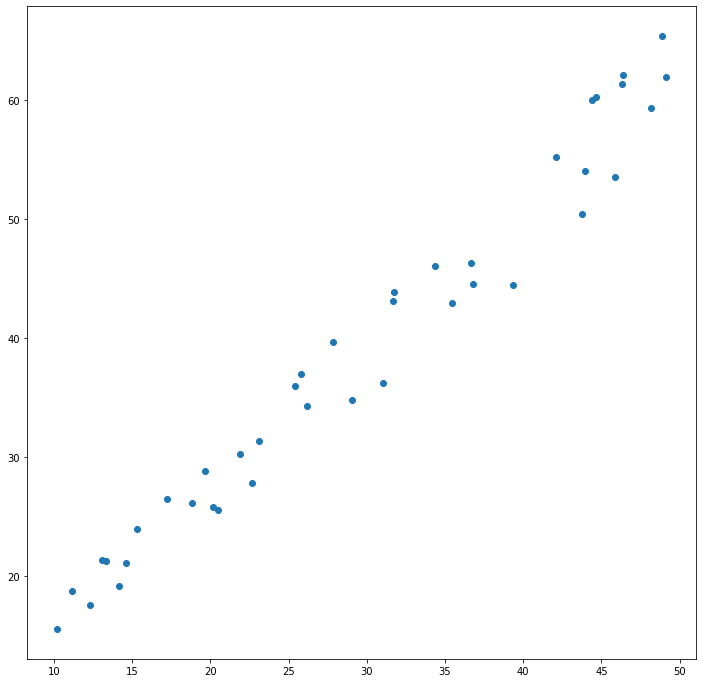

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(x,y)
plt.show()

In [61]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [62]:
gpr = GaussianProcessRegressor()
np.random.seed(42)
gpr.fit(x.reshape(-1, 1), y.reshape(-1,1))

GaussianProcessRegressor()

In [65]:
X_pred = np.linspace(10, 50, 500)
Y_pred, std_prediction = gpr.predict(X_pred.reshape(-1,1), return_std=True)

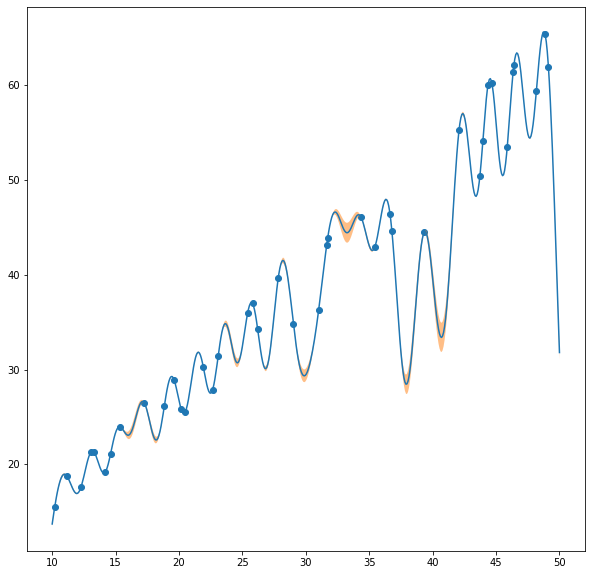

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(X_pred, Y_pred)
# plt.plot(X_pred, f1(X_pred), c='red')
plt.fill_between(
    X_pred.ravel(),
    Y_pred.ravel() - 1.96 * std_prediction,
    Y_pred.ravel() + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.show()

In [70]:
import pickle
with open('x_y_data.pickle', 'wb') as pickle_file:
    pickle.dump((x,y), pickle_file)